# Árvores de Decisão

- Escolher uma base de dados para análise.
- Fazer classificação dos dados utilizando árvore de decisão.
- Faça análise de desempenho da solução:
 - métricas de desempenho (acurácia, recall, ROC, …) 
 - critério (Gini, Entropia, ...)
 - técnicas de treinamento (validação cruzada, …)
- Apresente os resultados com conclusões em 5 minutos.


## Treinamento

In [170]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn import datasets

import random


import graphviz


In [162]:
#idv2 74:48 - 94:25 --- 74.8 - 94.42
#idv7 138:23 -142:02 --- 138.38333 - 142.03
#idv6 196:56 - 212:01 --- 196.93 ---212.016


In [163]:
data = pd.read_csv("heart.csv")
random.shuffle(data.columns.values[0:-1])


In [164]:
data.head()

,thal,chol,slope,fbs,trestbps,exang,sex,age,restecg,oldpeak,thalach,ca,cp,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [165]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[0:-1]], data['target'], test_size=0.3, train_size=0.7)

{'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 4}
0.7766990291262137
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.80      0.75      0.78        53

   micro avg       0.75      0.75      0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

DecisionTree: Area under the ROC curve = 0.7457795431976169


/home/rute/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


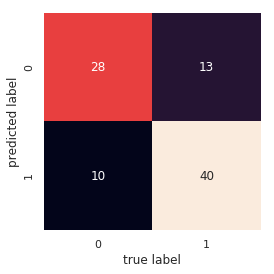

In [167]:
# Load data
#data = datasets.load_breast_cancer()
target_names = [0, 1]

# Cross Validation
model = DecisionTreeClassifier()

steps = [
#   Prepocessing
##  Calculate slopes
#   ('slope', estimate_slopes),
##  Feature Selection
#   ('feat_sel', feat_sel),
    ('decision_tree', model)
]
pipe = Pipeline(steps)

pipe_params = {
#     'slope__n': range(3, 21), # 2 < n <= 20, equivalente a 12 minutos
    'decision_tree__max_depth': range(1, 11),
    'decision_tree__criterion': ['gini', 'entropy']
}

grid_cv = GridSearchCV(pipe, param_grid=pipe_params, cv=10, scoring='f1', refit=True)
best = grid_cv.fit(X_train, y_train)
best_params = grid_cv.best_params_

best_estimator = grid_cv.best_estimator_.named_steps['decision_tree']
y_pred = grid_cv.predict(X_test)
print(grid_cv.best_params_)
print(grid_cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)

tree_performance = roc_auc_score(y_test, y_pred)

print ('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))


plt.xlabel('true label')
plt.ylabel('predicted label');


In [160]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [143]:
print(best_estimator)

Pipeline(memory=None,
     steps=[('decision_tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])


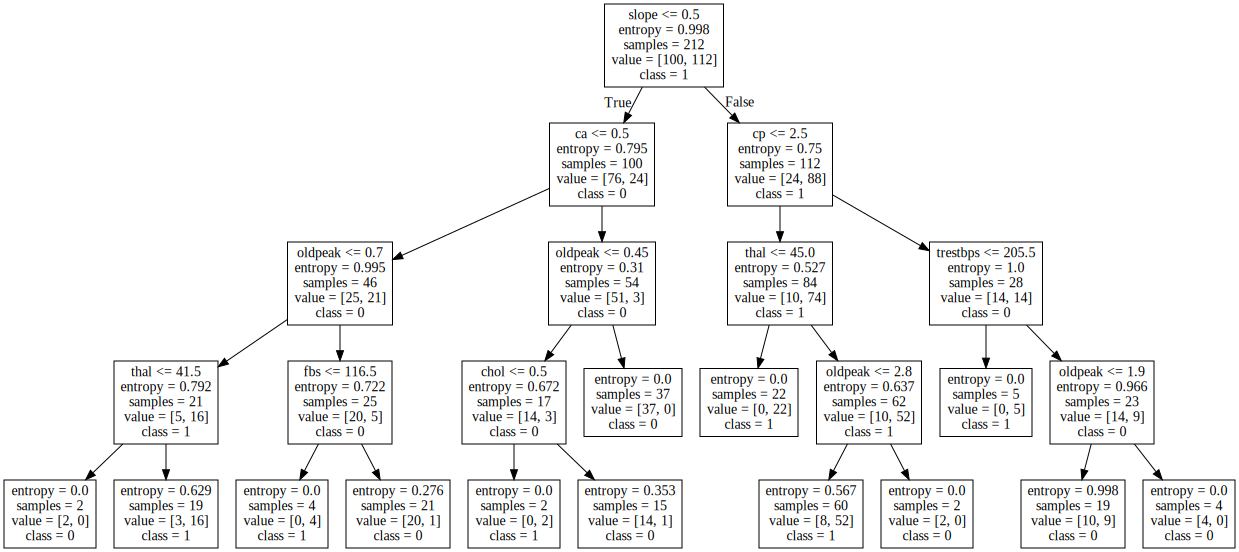

In [177]:
dot_data = tree.export_graphviz(best_estimator, out_file=None, feature_names=data.columns.values[0:-1], class_names=['Healthy', 'Unhealthy'])
graph = graphviz.Source(dot_data)
graph.render("tree")
graph